# 1. Color Selection

In [ ]:
"""
2 approaches to this problem 2 find white pixels
1.) If any one of the rgb value for a pixel is <200 make it black (bcz white needs all channels for a pixel >200)
2.) take a mask of image shape, In image if for a pixel all of the rgb values are >200, using AND condition get 
true for these pixels. apply this boolean on mask and make them 255.
"""

In [148]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [195]:
image = mpimg.imread('test.jpg') 

In [150]:
image.shape

(540, 960, 3)

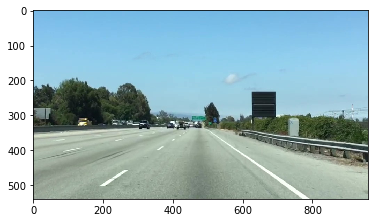

In [151]:
plt.imshow(image)
plt.show()

In [152]:
image_height = image.shape[0]
image_width = image.shape[1]

In [153]:
#no.of rows is same as ysize
#no.of cols is same as xsize

In [154]:
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [155]:
img_copy = np.copy(image)

In [156]:
#Thresholds
red_threshold = 220     #try 200
green_threshold = 220
blue_threshold = 220
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [157]:
#

In [158]:
#bool_arr outputs true if all rgb vaues of particular pixel are >220 else it gives false
#wherever it gives true assign 255 to it
bool_arr = np.logical_and.reduce((img_copy[:,:,0] > 220, img_copy[:,:,1] > 220, img_copy[:,:,2] > 220))

In [159]:
bool_arr.shape, img_copy.shape

((540, 960), (540, 960, 3))

In [187]:
mask_Arr = np.zeros((img_copy.shape[0],img_copy.shape[1]))
mask_Arr.shape

(540, 960)

In [88]:
#mask_Arr and bool_arr shape are same 
mask_Arr[bool_arr] = 255

In [160]:
plt.imshow(mask_Arr, cmap = 'gray')

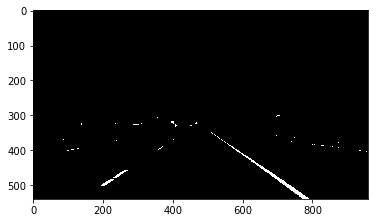

In [161]:
plt.show()

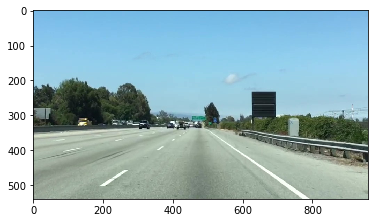

In [95]:
plt.imshow(image)
plt.show()

#Another way of coding it

#select any pixels below the threshold and set them to zero.

#all pixels that meet my color criterion (those above the threshold) will be retained,and those that do not (below the threshold) will be blacked out.

In [179]:
img2 = np.copy(image)
img2

array([[[122, 185, 229],
        [122, 185, 229],
        [123, 186, 230],
        ..., 
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ..., 
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ..., 
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       ..., 
       [[154, 166, 154],
        [156, 168, 156],
        [153, 165, 153],
        ..., 
        [180, 197, 181],
        [181, 198, 182],
        [181, 198, 182]],

       [[162, 174, 164],
        [160, 172, 162],
        [152, 164, 154],
        ..., 
        [174, 192, 176],
        [175, 193, 177],
        [176, 194, 178]],

       [[156, 168, 158],
        [148, 160, 150],
        [137, 149, 139],
        ..., 
        [161, 179, 163],
        [162, 180, 164],
        [162, 180,

In [180]:
img2[:,:,0] < rgb_threshold[0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [181]:
img2[:,:,1] < rgb_threshold[1]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [182]:
img2[:,:,2] < rgb_threshold[2]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [183]:
thresholds = (img2[:,:,0] < rgb_threshold[0]) | (img2[:,:,1] < rgb_threshold[1]) | (img2[:,:,2] < rgb_threshold[2])
thresholds

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [184]:
thresholds.shape

(540, 960)

In [186]:
img2.shape

(540, 960, 3)

In [192]:
#img2 and thresholds are of different shape
img2[thresholds] = [0,0,0]

In [ ]:
#this can also be used
#img2[thresholds] = 0

In [194]:
np.unique(img2) #original image pixel values are same as we just masked the non-white pixels

array([  0, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8)

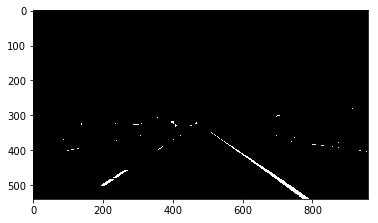

In [193]:
plt.imshow(img2)
plt.show()

# Practice example to better explain whats happening

In [130]:
z = np.array([[[140,54,175],[132,58,120]],[[110,54,125],[32,175,20]],[[130,4,75],[222,128,120]]])

In [131]:
z 

array([[[140,  54, 175],
        [132,  58, 120]],

       [[110,  54, 125],
        [ 32, 175,  20]],

       [[130,   4,  75],
        [222, 128, 120]]])

In [132]:
z[:,:,0] < 100  #1st channel

array([[False, False],
       [False,  True],
       [False, False]], dtype=bool)

In [133]:
z[:,:,1] < 100

array([[ True,  True],
       [ True, False],
       [ True, False]], dtype=bool)

In [134]:
z[:,:,2] < 100

array([[False, False],
       [False,  True],
       [ True, False]], dtype=bool)

In [135]:
th = (z[:,:,0] < 100 ) | (z[:,:,1] < 100) | (z[:,:,2] < 100)
th   #Even if one value of RGB is <100 

array([[ True,  True],
       [ True,  True],
       [ True, False]], dtype=bool)

In [188]:
y = np.array([[10,20],[20,30],[40,50]])
y.shape

(3, 2)

In [144]:
y[th] = [0,0,0] #we can't assign this as there is only one channel, [0,0,0] means making r=0,g=0,b=0

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 5 output values where the mask is true

In [190]:
y[th] = 0

In [191]:
y

array([[ 0,  0],
       [ 0,  0],
       [ 0, 50]])

# 2. Region Masking

In [221]:
region = np.copy(image)

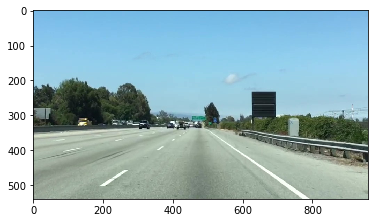

In [202]:
# Define a triangle region of interest 
# origin (x=0, y=0) is in the upper left in image processing
plt.imshow(region)
plt.show()

In [203]:
#Interested area is just the triangle
left_bottom = [150,region.shape[0]]
right_bottom = [820,region.shape[0]]
apex = [450,250]

In [204]:
#join the points to form a line(y=Ax+B) using np.polyfit( ) which returns [A, B]
left_line = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
right_line = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
bottom_line = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

In [208]:
print('left line', left_line)
print('right line', right_line)
print('bottom line', bottom_line)

left line [  -0.96666667  685.        ]
right line [   0.78378378 -102.7027027 ]
bottom line [  6.81897401e-17   5.40000000e+02]


In [224]:
#np.arange(0, image_width)

In [230]:
YY > (XX*left_line[0] + left_line[1])

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]], dtype=bool)

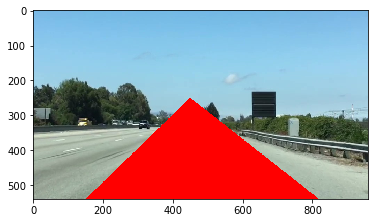

In [229]:
XX, YY = np.meshgrid(np.arange(0, image_width), np.arange(0, image_height)) #to get x,y co-ordinates of each pixel
region_thresholds = (YY > (XX*left_line[0] + left_line[1])) & \
                    (YY > (XX*right_line[0] + right_line[1])) & \  # y > Ax + B, A IS SLOPE, B is intercept we got it 4m polyfit 
                    (YY < (XX*bottom_line[0] + bottom_line[1])) # > or < or = symbol depends on  

# Color pixels red which are inside the region of interest
region[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region)
plt.show()

In [225]:
region_thresholds

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [207]:
XX.shape, YY.shape

((540, 960), (540, 960))

In [210]:
XX

array([[  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       ..., 
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959]])

In [211]:
YY

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ..., 
       [537, 537, 537, ..., 537, 537, 537],
       [538, 538, 538, ..., 538, 538, 538],
       [539, 539, 539, ..., 539, 539, 539]])

In [214]:
XX,YY

(array([[  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        ..., 
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ..., 
        [537, 537, 537, ..., 537, 537, 537],
        [538, 538, 538, ..., 538, 538, 538],
        [539, 539, 539, ..., 539, 539, 539]]))

In [45]:
# import pandas as pd
# from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'